In [8]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Cross-Validation and Bias-Variance decomposition
## Cross-Validation
Implementing 4-fold cross-validation below:

In [9]:
from helpers import load_data

# load dataset
x, y = load_data()

In [10]:
def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold."""
    num_row = y.shape[0]
    interval = int(num_row / k_fold)
    np.random.seed(seed)
    indices = np.random.permutation(num_row)
    k_indices = [indices[k * interval: (k + 1) * interval]
                 for k in range(k_fold)]
    return np.array(k_indices)

In [11]:
from costs import compute_mse
from costs import compute_rmse
from ridge_regression import ridge_regression
from build_polynomial import build_poly

def cross_validation(y, x, k_indices, k, lambda_, degree):
    """return the loss of ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train: TODO
    # ***************************************************
    testx = []
    testy = []
    trainx = []
    trainy = []
    assert len(x) == len (y)
    for i in range(len(x)):
        if i in k_indices[k]: 
            testy.append(y[i])
            testx.append(x[i])
        else:
            trainy.append(y[i])
            trainx.append(x[i])
    # ***************************************************
    # INSERT YOUR CODE HERE
    # form data with polynomial degree: TODO
    # ***************************************************
    tx_train = build_poly(np.array(trainx),degree)
    tx_test = build_poly(np.array(testx),degree)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    w = ridge_regression(np.array(trainy),tx_train,lambda_)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate the loss for train and test data: TODO
    # ***************************************************
    loss_tr = compute_rmse(trainy,tx_train,w)
    loss_te = compute_rmse(testy,tx_test,w)
    return loss_tr, loss_te

0.0001 0 1.13435296171 12.4888969693
0.0001 1 1.13185302898 0.98233828063
0.0001 2 1.156321881 0.966579532388
0.0001 3 0.744405658359 1.88742276183
0.000161026202756 0 1.13439400784 12.2915617879
0.000161026202756 1 1.13185319278 0.982425384627
0.000161026202756 2 1.15632302538 0.966727885973
0.000161026202756 3 0.744412021167 1.88697400734
0.00025929437974 0 1.13449305447 11.9883314214
0.00025929437974 1 1.13185360891 0.982563333649
0.00025929437974 2 1.15632590462 0.966965747551
0.00025929437974 3 0.744428082471 1.88626528911
0.000417531893656 0 1.13472288568 11.534197689
0.000417531893656 1 1.13185465346 0.982779664379
0.000417531893656 2 1.15633302145 0.967345909822
0.000417531893656 3 0.744467987461 1.88515864357
0.00067233575365 0 1.1352268545 10.8790774021
0.00067233575365 1 1.13185722743 0.983113713758
0.00067233575365 2 1.15635013521 0.967949981252
0.00067233575365 3 0.744564711547 1.88346067517
0.00108263673387 0 1.13624986183 9.98184345908
0.00108263673387 1 1.1318633955 0.9

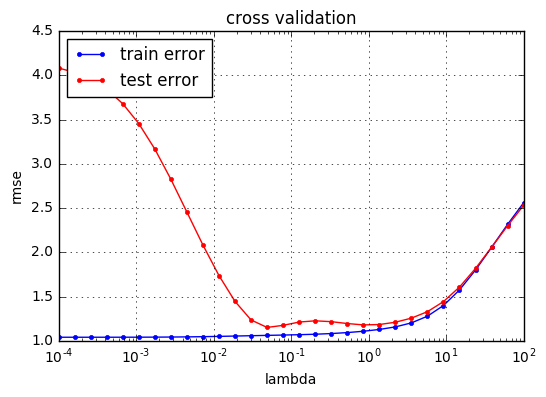

In [12]:
from plots import cross_validation_visualization

def cross_validation_demo():
    seed = 1
    degree = 7
    k_fold = 4
    lambdas = np.logspace(-4, 0, 30)
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # ***************************************************
    # INSERT YOUR CODE HERE
    # cross validation: TODO
    # ***************************************************
    for l in lambdas:
        rmse_tr.append(0.0)
        rmse_te.append(0.0)
        for i in range(k_fold):
            loss_tr, loss_te = cross_validation(x,y,k_indices,i,l,degree)
            print(l,i,loss_tr, loss_te)
            rmse_tr[-1]+= loss_tr
            rmse_te[-1]+= loss_te
        rmse_tr[-1]/=k_fold
        rmse_te[-1]/=k_fold
        
        
    print(k_indices)
    
    cross_validation_visualization(lambdas, rmse_tr, rmse_te)

cross_validation_demo()

In [13]:
print(build_poly(np.array([2,5]),7))

[[  1.00000000e+00   2.00000000e+00   4.00000000e+00   8.00000000e+00
    1.60000000e+01   3.20000000e+01   6.40000000e+01   1.28000000e+02]
 [  1.00000000e+00   5.00000000e+00   2.50000000e+01   1.25000000e+02
    6.25000000e+02   3.12500000e+03   1.56250000e+04   7.81250000e+04]]


## Bias-Variance Decomposition
Visualize bias-variance trade-off by implementing the function `bias_variance_demo()` below:

In [14]:
from least_squares import least_squares
from split_data import split_data
from plots import bias_variance_decomposition_visualization

def bias_variance_demo():
    """The entry."""
    # define parameters
    seeds = range(100)
    num_data = 10000
    ratio_train = 0.005
    degrees = range(1, 10)
    
    # define list to store the variable
    rmse_tr = np.empty((len(seeds), len(degrees)))
    rmse_te = np.empty((len(seeds), len(degrees)))
    
    for index_seed, seed in enumerate(seeds):
        np.random.seed(seed)
        x = np.linspace(0.1, 2 * np.pi, num_data)
        y = np.sin(x) + 0.3 * np.random.randn(num_data).T
        # ***************************************************
        # INSERT YOUR CODE HERE
        # split data with a specific seed: TODO
        # ***************************************************
        raise NotImplementedError
        # ***************************************************
        # INSERT YOUR CODE HERE
        # bias_variance_decomposition: TODO
        # ***************************************************
        raise NotImplementedError

    bias_variance_decomposition_visualization(degrees, rmse_tr, rmse_te)

bias_variance_demo()

NotImplementedError: 